Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

Загружаем файл с данными:

In [2]:
data=pd.read_csv("csv/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Распределение артериального давления:

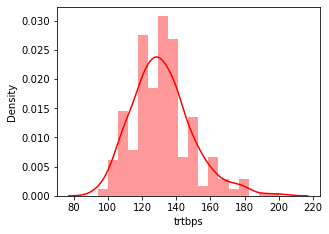

In [21]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(434)
sns.distplot(data['trtbps'], color="red",  kde= True,label='Артериальное давление')
plt.show()

На гистограмме видим характерное — похожее на колокол — нормальное распределение, так как мы знаем, что артериальное давление — одна из величин, которые могут распределяться нормально. Посмотрим отдельно статистики распределения артериального давления.

# Найдем среднее значение артериального давления (trtbps) по формуле:

$$M(X) = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$$

где $x$ — артериальное давление, $n$ — количество наблюдений.

In [4]:
mean_height = data['trtbps'].sum() / data['trtbps'].count()
mean_height

131.62376237623764

In [5]:
data['trtbps'].mean()

131.62376237623764

# Найдем среднеквадратичное отклонение по формуле:

$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

Оно показывает, насколько далеко наблюдения могут быть «разбросаны» относительно среднего значения.

In [7]:
height_std = np.sqrt(((data['trtbps'] - data['trtbps'].mean())**2).sum() / data['trtbps'].count())
height_std

17.509178065734393

In [8]:
data['trtbps'].std(ddof=0)

17.509178065734385

**Дисперсия** равна среднему квадратичному отклонению, возведенному в квадрат **(смещенная дисперсия)**:

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}$$

Посчитаем дисперсию артериального давления:

In [9]:
height_variance = ((data['trtbps'] - data['trtbps'].mean())**2).sum() / data['trtbps'].count()
height_variance

306.5713165375944

In [11]:
data['trtbps'].var(ddof=0)

306.5713165375941

**Несмещенная оценка дисперсии**:

$$\sigma^2_{несмещ.} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}$$

In [10]:
height_variance2 = ((data['trtbps'] - data['trtbps'].mean())**2).sum() / (data['trtbps'].count() - 1)
height_variance2

307.58645334732154

In [12]:
data['trtbps'].var(ddof=1)

307.5864533473212

Медиана - значение, которое делит выборку на две части, так что значения, которые меньше медианы, создают половину (50%) выборки.

In [19]:
data['trtbps'].median()

130.0

# **Распределение признаков болезни сердца**

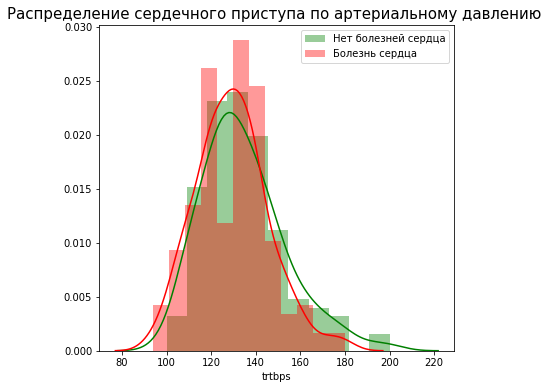

In [7]:
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='green',label='Нет болезней сердца') #Зеленый при отсутствии забол 
sns.distplot(data[data['output'] == 1]["trtbps"], color='red',label='Болезнь сердца') #Красный при сердечных заболеваниях
plt.title('Распределение сердечного приступа по артериальному давлению ', fontsize=15)
plt.legend()

Люди с давлением от 110 до 140 более подвержены заболеванию сердца.

# Распределение артериального давления по полу:

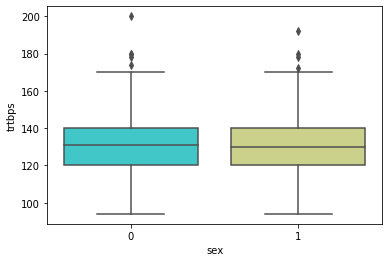

In [4]:
sns.boxplot(x="sex", y="trtbps", data=data, palette='rainbow')

Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. 

Как видно из полученной диаграммы артериальное давление не завист от пола, нижняя квартель занимает положение от 90 до 120, верхняя квартель 140 - 170, имеются выбросы давления у мужчин до 200, у женщин до 190.

# **Корреляция между атрибутами**

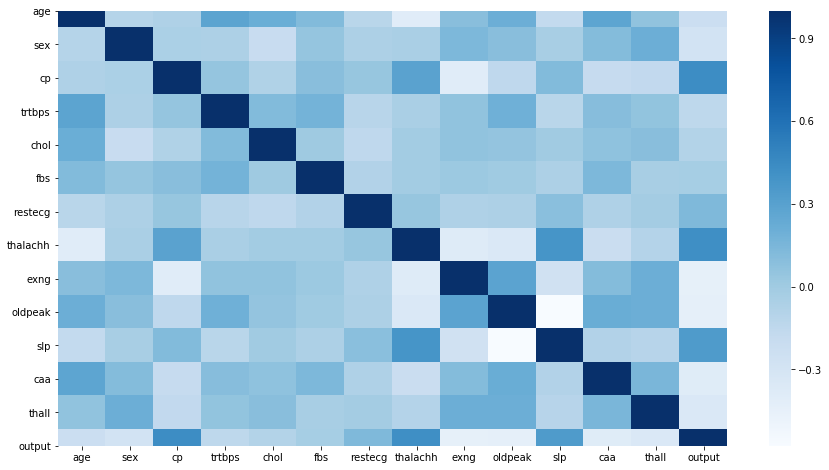

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="Blues")

In [6]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Как видно из приведенного выше графика и таблицы, артериальное давление имеет положительную корреляцию с возрастом (age), предыдущим пиком (oldpeak) и сахаром в крови (fbs) и имеет отрицательную корелящию с полом (sex) и частотой сердечных сокращений (thalachh).